In [ ]:
#  register number: 22MIA1045
# name: Mathumita.s

# Mall customer segmentation

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans
from kneed import KneeLocator


In [61]:
df = pd.read_csv("C:\\Users\\Selvakumar\\Desktop\\Mall_Customers.csv")


In [62]:
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
# step 1: data cleaning: handling na
print(df.isnull().sum())

print("no missing values")

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
no missing values


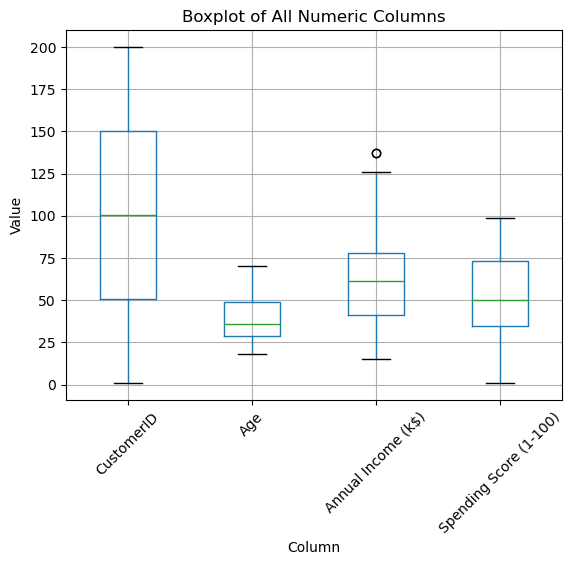

In [64]:
df.boxplot()                 #   step 1:   check for outliers   (no outliers detected)
plt.title('Boxplot of All Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()



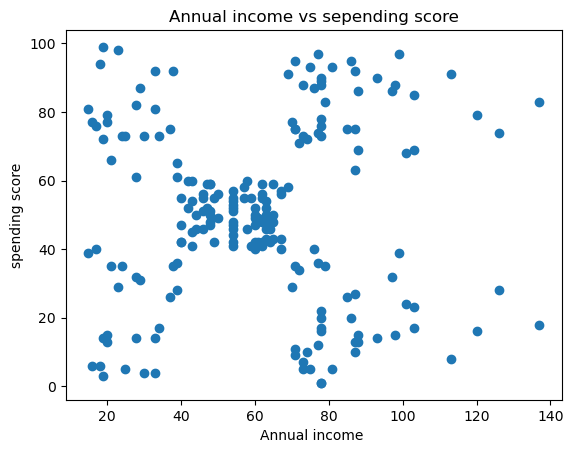

its clear from the plot that clusters exist


In [65]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Annual income vs sepending score')
plt.xlabel('Annual income ')
plt.ylabel('spending score')
plt.show()


print("its clear from the plot that clusters exist")

In [66]:
one_hot_encoded_data = pd.get_dummies(df, columns = [ 'Gender'])
one_hot_encoded_data.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


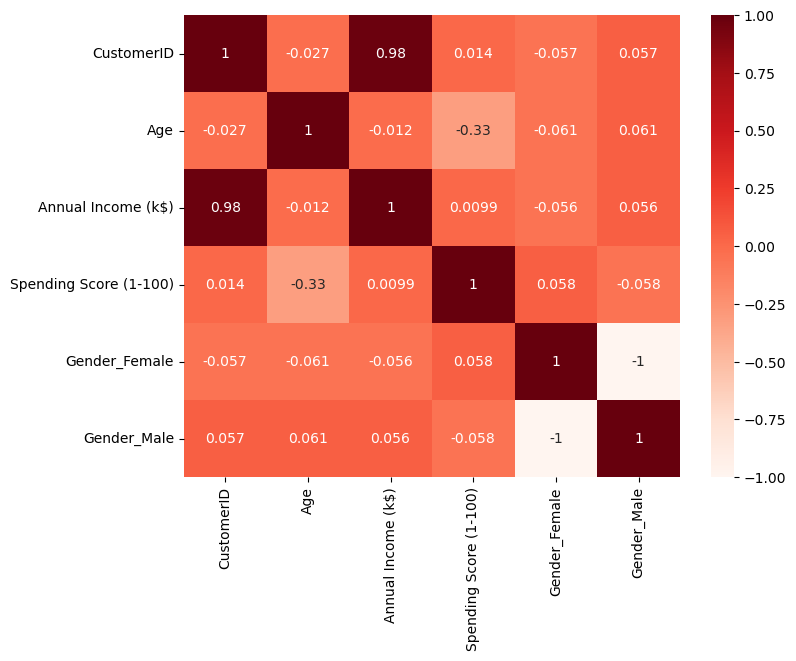

In [67]:
df2=one_hot_encoded_data
plt.figure(figsize=(8,6))                           # weak negative correlateion between age and spending score  no other significant corr
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a m

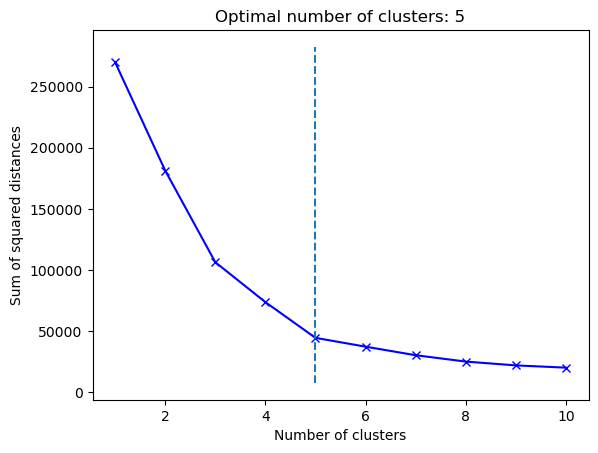

The optimal number of clusters is: 5


In [68]:



data = df2  

# Selecting specific columns for clustering
selected_columns = ['Annual Income (k$)', 'Spending Score (1-100)']

# Extracting the selected columns from the dataset
data_selected = df2[selected_columns]

inertias = []

# Perform KMeans clustering for different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_selected)
    inertias.append(kmeans.inertia_)

# Find the knee point using KneeLocator
x = range(1, 11)
y = inertias
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
optimal_clusters = kn.knee

# Plot the inertia values and knee point
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title(f'Optimal number of clusters: {optimal_clusters}')
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")


C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


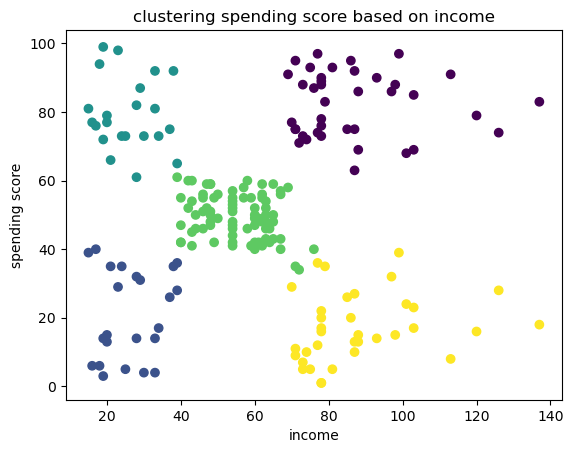

In [69]:
data = df2[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

                  

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],  c=kmeans.labels_)
plt.title("clustering spending score based on income")
plt.xlabel("income")
plt.ylabel("spending score")
plt.show()

In [70]:
#the clustered customer segements are: 

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)


print("Customer segments:")
print(centroids_df)

Customer segments:
   Annual Income (k$)  Spending Score (1-100)
0           86.538462               82.128205
1           26.304348               20.913043
2           25.727273               79.363636
3           55.296296               49.518519
4           88.200000               17.114286
